In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

## 1. Audio Signal Basics
1.1 Create a function that describes a pressure wave that is impinging on a microphone. Assume that the sound wave is a sustained, single note of frequency $f$ and amplitude $A$, and that $p(0) = 0$. This represents our *analog signal*. The function that you create is defined on a continuous domain.

In [3]:
# 1.1 SOLUTION
import numpy as np
def p(t, A, f): return A*np.sin(2*np.pi*f*t)

1.2. Sample the analog signal of  a sound wave for a $C_{4}$-note (261.63 Hz) played for 3 seconds. Use the standard audio sampling rate. That is, evaluate your function at regularly-spaced times according to this sampling rate and time duration. You may want to use `numpy.linspace` to generate the times at which you will sample.

In [4]:
# 1.2 SOLUTION
T = 3
fs = 44100
f = 261.63
t = np.linspace(0, 3, 3*fs)
c_4 = p(t,1,f)

1.3 Plot 3 periods of the sound wave, with the x-axis labeled with units.

Pseudo code for plotting:

```python
fig, ax = plt.subplots()
t = # array/sequence of times
amp = # array/sequence of samples
ax.plot(t, amp, marker='x')
ax.set_xlabel("t (seconds)");
```

<IPython.core.display.Javascript object>


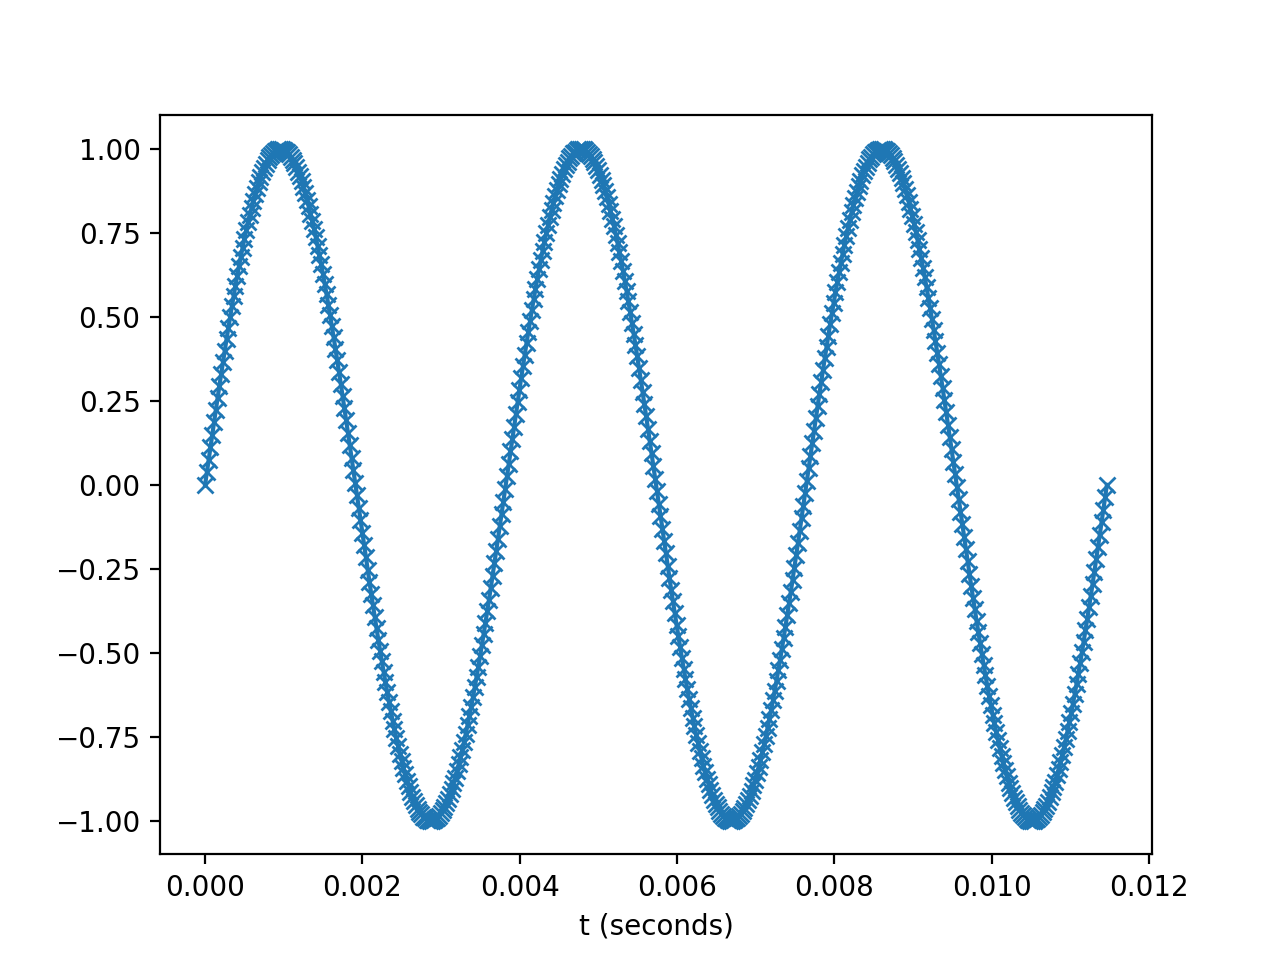

In [5]:
fig, ax = plt.subplots()
t = np.linspace(0, 3/f, round(3*fs/f))
ax.plot(t, p(t, 1, f), marker='x')
ax.set_xlabel("t (seconds)");

Play the 3-second audio using

```python
from IPython.display import Audio
Audio(data, rate=???)
```
Note that `Audio` automatically normalized the volume according to its slider, so the amplitude that we set will have no effect. Adjusting the amplitude would typically manifest as a change in volume!

In [6]:
from IPython.display import Audio
Audio(c_4, rate=fs)

1.4 Plot the wave form of the C-major triad for 0.64 seconds. This should be the sum of three sine waves of equal amplitudes (1) of the following respective frequencies:
 - 523.25 Hz (C)
 - 659.25 Hz (E)
 - 783.99 Hz (G)
 
Here is the pseudocode for plotting

```python
fig, ax = plt.subplots()
ax.plot(time, amps)
ax.set_xlabel("t (seconds)")
ax.set_title("Major Triad");
```

<IPython.core.display.Javascript object>


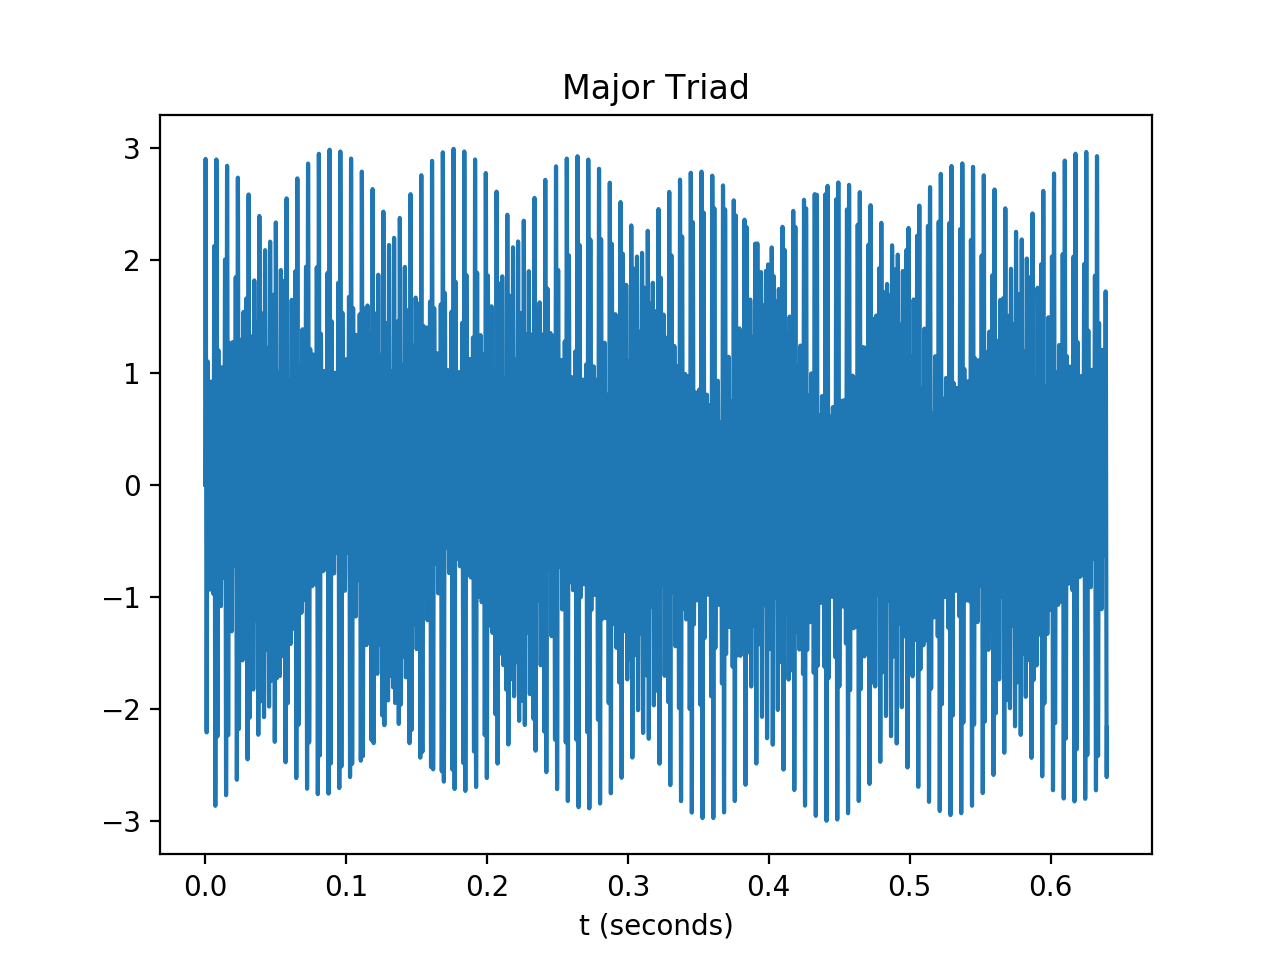

In [10]:
# 1.4 SOLUTION
T = 0.64
t = np.linspace(0, T, int(fs*T))
ch = p(t, 1, 523.25) + p(t, 1, 659.25) + p(t, 1, 783.99) 

fig, ax = plt.subplots()
ax.plot(t, ch)
ax.set_xlabel("t (seconds)")
ax.set_title("Major Triad");

Play the major triad audio clip for 3 seconds.

In [12]:
# SOLUTION
T = 3
t = np.linspace(0, T, fs*T)
ch = p(t, 1, 523.25) + p(t, 1, 659.25) + p(t, 1, 783.99) 

In [13]:
from IPython.display import Audio
Audio(ch, rate=fs)

Isn't it beautiful? 😛
Notice how messy looking the waveform is. It is wholly unintuitive to look at the data in this way, even though it is only comprised of 3 simple notes. In the next section, we will see that we can convert this *amplitude-time* data into *amplitude-frequency* data, which is much more useful for us! This conversion process is known as a **Fourier Transform**. 

Now, define a function that describes a pressure wave for **noise** (use `numpy.random.rand` to generate samples randomly between 0 and 1). Plot some of its "wave form".

In [15]:
# SOLUTION
def noise(t): return np.random.rand(*t.shape)

<IPython.core.display.Javascript object>


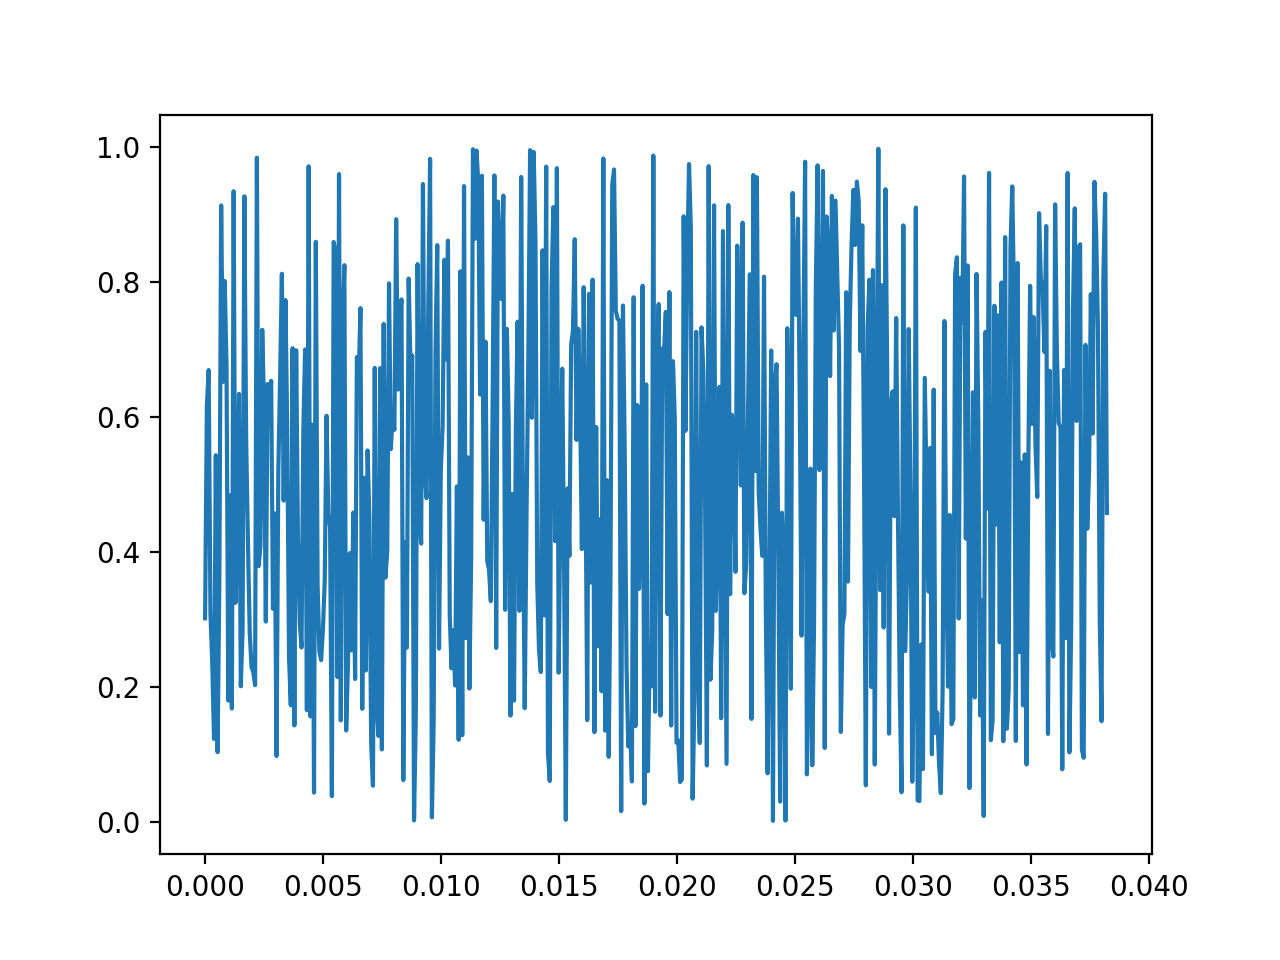

In [16]:
fig, ax = plt.subplots()
t = np.linspace(0, 10/f, round(3*fs/f))
ax.plot(t, noise(t))

Now play 3 seconds of noise!

In [17]:
# SOLUTION
t = np.linspace(0, 3, 3*fs)
Audio(noise(t), rate=fs)